In [2]:
import os 
os.chdir('C:/Users/valer/OneDrive/Desktop/università/IV anno/Python and R for Data Science')

In [3]:
# We first retrieve the contents from a web ULR using the requests module
import requests
res = requests.get("https://api.artic.edu/api/v1/artworks")

# Then we write the contents to a specific file
file1 =  open("./file-" + "Art-institute-of-chicago" + ".json", "w+")
file1.writelines(res.text)
file1.close()


# Finally we manipulate the data and load them in a dataframe, so that we can use the to_csv() function to create a .csv
import json
import pandas as pd

l = []
dati_json = json.load(open("./file-" + "Art-institute-of-chicago" + ".json"))
for h in dati_json["data"]:
    x = list(h.values())
    l.append(x)
        
csv_file_path = 'Art.csv'
df = pd.DataFrame(l)
df.to_csv(csv_file_path, sep = ';', index=False)
dati_json["data"]




[{'id': 8969,
  'api_model': 'artworks',
  'api_link': 'https://api.artic.edu/api/v1/artworks/8969',
  'is_boosted': False,
  'title': 'Beggar with Oysters (Philosopher)',
  'alt_titles': None,
  'thumbnail': {'lqip': 'data:image/gif;base64,R0lGODlhAwAFAPMAABAQDRMRDhMSDxQSDhgUDwkRFBESEBgVEB8bFRoaGBgcHColIDs0Kkc+L0hBNgAAACH5BAAAAAAALAAAAAADAAUAAAQL8CAi1ADFrBQcaxEAOw==',
   'width': 1312,
   'height': 2250,
   'alt_text': 'A work made of oil on canvas.'},
  'main_reference_number': '1931.504',
  'has_not_been_viewed_much': False,
  'boost_rank': None,
  'date_start': 1860,
  'date_end': 1870,
  'date_display': '1865/67',
  'date_qualifier_title': '',
  'date_qualifier_id': None,
  'artist_display': 'Édouard Manet\nFrench, 1832-1883',
  'place_of_origin': 'France',
  'dimensions': '188.0 × 111.0 cm (74 × 43 5/16 in.)',
  'medium_display': 'Oil on canvas',
  'inscriptions': 'Inscribed lower left: Manet',
  'credit_line': 'Arthur Jerome Eddy Memorial Collection',
  'publication_history': 'H

In [57]:
# ----------------------------------------------------------------------#
# -------------------- Some Data Manipulation --------------------------#
# ----------------------------------------------------------------------#

# Remove last column from the dataset as it is useless
df = df.iloc[:,0:92]

# Assign variable names to the columns of the dataset
col = [i for i in [dati_json["data"][0]]]
df2 = df.set_axis(col[0], axis=1, inplace=False)
df2.head()

# The thumbnail column is still a dictionary containing 4 keys.
# We need to save the values of each key in a correpsonding column named after the key itself.

# Create a list of new column names
newcol_names = list()
for i in df.iloc[:,6][1]:
    newcol_names.append(i)
print(newcol_names)

# Create lists containing data corresponding to the new column name
lqip_data = list()
width_data = list()
height_data = list()
alt_text_data = list()
for j in range(0,12):
    lqip_data.append(df.iloc[:,6][j][newcol_names[0]])
for j in range(0,12):
    width_data.append(df.iloc[:,6][j][newcol_names[1]])
for j in range(0,12):
    height_data.append(df.iloc[:,6][j][newcol_names[2]])
for j in range(0,12):
    alt_text_data.append(df.iloc[:,6][j][newcol_names[3]])
    
# Remove thumbnail from the dataset
#df2 = df2.drop(labels = 'thumbnail', axis = 1)

# Add the new columns
df2['lqip'] = lqip_data
df2['width'] = width_data
df2['height'] = height_data
df2['alt_text'] = alt_text_data

df2.head(12)

['lqip', 'width', 'height', 'alt_text']


,id,api_model,api_link,is_boosted,title,alt_titles,thumbnail,main_reference_number,has_not_been_viewed_much,boost_rank,...,section_titles,site_ids,suggest_autocomplete_all,last_updated_source,last_updated,timestamp,lqip,width,height,alt_text
0,8969,artworks,https://api.artic.edu/api/v1/artworks/8969,False,Beggar with Oysters (Philosopher),None,"{'lqip': 'data:image/gif;base64,R0lGODlhAwAFAP...",1931.504,False,NaN,...,"[Cat. 10 Beggar with Oysters (Philosopher), 1...",[],"[{'input': ['1931.504'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:06-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhAwAFAPMAABAQDRMR...",1312,2250,A work made of oil on canvas.
1,9614,artworks,https://api.artic.edu/api/v1/artworks/9614,False,Haunted House,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBAAFAP...",1931.707,False,NaN,...,[],[],"[{'input': ['1931.707'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:06-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhBAAFAPQAABsXFR4Z...",2003,2250,A work made of oil on canvas.
2,10550,artworks,https://api.artic.edu/api/v1/artworks/10550,False,The Dance,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBAAFAP...",1932.52,False,NaN,...,[],[],"[{'input': ['1932.52'], 'contexts': {'grouping...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:05-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhBAAFAPQAADUlIjgl...",5226,6362,A work made of oil on canvas.
3,11312,artworks,https://api.artic.edu/api/v1/artworks/11312,False,Woman Mending,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBAAFAP...",1959.636,False,NaN,...,"[Cat. 15 Woman Mending, 1895]",[],"[{'input': ['1959.636'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:05-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhBAAFAPQAAEw/QE5B...",1850,2250,A work made of oil on canvas.
4,16571,artworks,https://api.artic.edu/api/v1/artworks/16571,True,"Arrival of the Normandy Train, Gare Saint-Lazare",None,"{'lqip': 'data:image/gif;base64,R0lGODlhBwAFAP...",1933.1158,False,NaN,...,"[Cat. 16 Arrival of the Normandy Train, Gare ...",[],"Arrival of the Normandy Train, Gare Saint-Lazare","[{'input': ['1933.1158'], 'contexts': {'groupi...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:04-06:00,"data:image/gif;base64,R0lGODlhBwAFAPUAADU8QkRO...",6786,5092,Loosely painted image of an open-air train sta...
5,21678,artworks,https://api.artic.edu/api/v1/artworks/21678,False,Foliate Bowl with Stylized Peony Spray,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBQAFAP...",1964.847,False,NaN,...,[],[],"[{'input': ['1964.847'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:03-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhBQAFAPQAAGprc3N1...",2250,2250,A work made of qingbai ware; porcelain with un...
6,21727,artworks,https://api.artic.edu/api/v1/artworks/21727,False,Thanksgiving,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBwAFAP...",1935.313,False,NaN,...,[],[],"[{'input': ['1935.313'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:03-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base64,R0lGODlhBwAFAPUAAEM6NVA+...",8300,5816,A chaotic but happy kitchen scene: A light-ski...
7,24306,artworks,https://api.artic.edu/api/v1/artworks/24306,True,Blue and Green Music,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBAAFAP...",1969.835,False,60.0,...,[],[],Blue and Green Music,"[{'input': ['1969.835'], 'contexts': {'groupin...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:03-06:00,"data:image/gif;base64,R0lGODlhBAAFAPQAADpDPD5I...",4202,5084,Abstract painting in predominant shades of blu...
8,25812,artworks,https://api.artic.edu/api/v1/artworks/25812,False,Bullfight,None,"{'lqip': 'data:image/gif;base64,R0lGODlhBgAFAP...",1937.1019,False,NaN,...,"[Cat. 9 Bullfight, 1865/66]",[],"[{'input': ['1937.1019'], 'contexts': {'groupi...",2021-12-13T00:30:06-06:00,2021-12-13T00:32:02-06:00,2021-12-13T05:45:22-06:00,"data:image/gif;base6

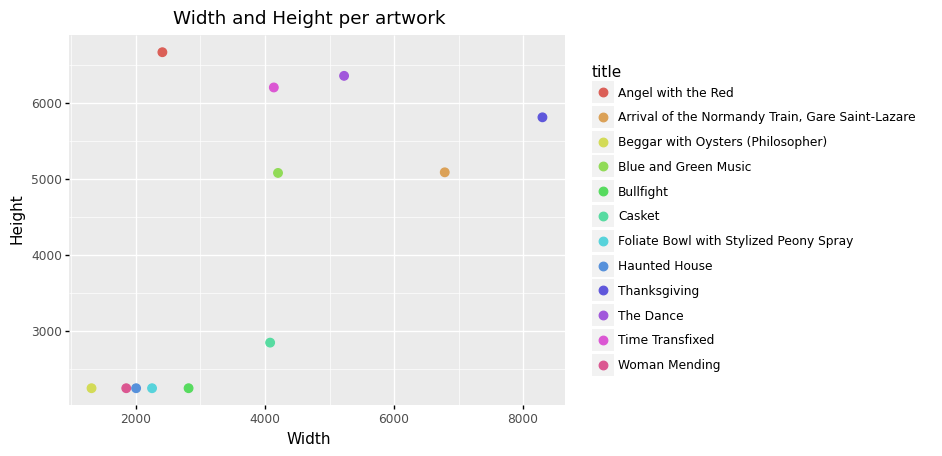

<ggplot: (124411217716)>

In [19]:
# ----------------------------------------------------------------------#
# -------------------- Some Data Exploration- --------------------------#
# ----------------------------------------------------------------------#

# Import ggplot functions from plotnine

from plotnine import *

# Plot each artwork dimension

(
    ggplot(df2)
    + geom_point(aes(x = 'width', y = 'height', color = 'title', fill = 'title'), size = 3)
    + ggtitle('Width and Height per artwork')
    + ylab('Height')
    + xlab('Width')
)

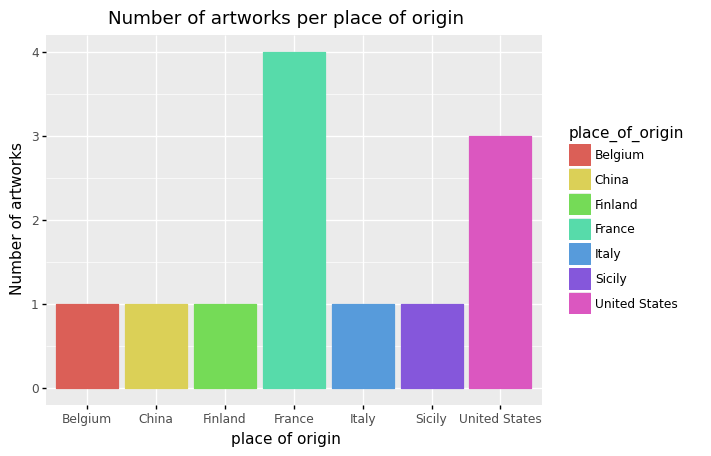

<ggplot: (124412584906)>

In [20]:
# Plot the number of artworks per place of origin

(
    ggplot(df2)
    + geom_bar(aes(x = 'place_of_origin', color = 'place_of_origin', fill = 'place_of_origin'))
    + ggtitle('Number of artworks per place of origin')
    + ylab('Number of artworks')
    + xlab('place of origin')
)

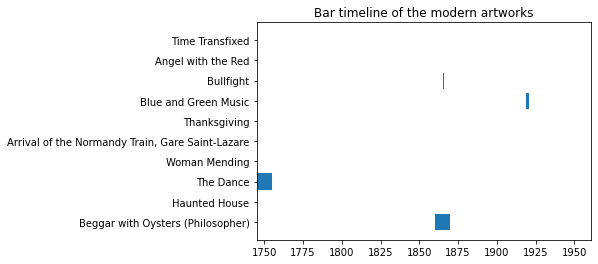

In [66]:
# Plot a bar timeline of artworks' realization period

import matplotlib.pyplot as plt

# Separte the modern artworks (from 18th to 20th century) from older ones (12th century)

modern_start = df2['date_start'].drop([5,9])
modern_end = df2['date_end'].drop([5,9])
modern_title = df2['title'].drop([5,9])

ancient_start = df2['date_start'].iloc[[5,9]]
ancient_end = df2['date_end'].iloc[[5,9]]
ancient_title = df2['title'].iloc[[5,9]]

# Plot the bar timeline for modern artworks
plt.barh(range(len(modern_start)),  modern_end-modern_start, left=modern_start)
plt.yticks(range(len(modern_start)), modern_title)
plt.title('Bar timeline of the modern artworks')
plt.show()

# Not so good or useful

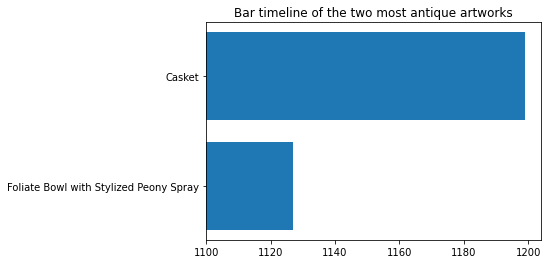

In [68]:
# Plot the antique artworks bar timeline
plt.barh(range(len(ancient_start)),  ancient_end-ancient_start, left=ancient_start)
plt.yticks(range(len(ancient_start)), ancient_title)
plt.title("Bar timeline of the two most antique artworks")
plt.show()

# Better